<h3><b>Sesión 3 :: Diseño de control difuso</b></h3>
Autor: Claudio Morales Díaz  // INACAP Puente Alto. (Chile, 2020)

In [1]:
# Comentar de esta parte en caso de no usar "Google Colab"
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Comentar de esta parte en caso de no usar "Google Colab"
# Se añade la librería "fuzzy", copiando el fichero previamente
# Si existen errores posteriormente -> "Reiniciar entorno de ejecución"
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
from fuzzy import *

In [3]:
# Librerías requeridas
import numpy as np
from matplotlib import pyplot as plt

<h3><b>PROCEDIMIENTO PASO A PASO</b></h3>
<h4>1. Definimos las variables lingüísticas de entrada y salida</h4>

In [38]:
# Universo de discurso para la posición del cabezal
pos_cabezal = np.linspace(-20, 20, 100)

# Funciones de pertenencia para la posición del cabezal
PNG = trapmf(pos_cabezal, [-20, -20, -10, -5])
PNP = trimf(pos_cabezal, [-10, -5, 0])
PC = trimf(pos_cabezal, [-5, 0, 5])
PPP = trimf(pos_cabezal, [0, 5, 10])
PPG = trapmf(pos_cabezal, [5, 10, 20, 20])

# Universo de discurso para el voltaje del motor
voltaje = np.linspace(-12, 12, 100)

# Funciones de pertenencia para el voltaje
VNG = trapmf(voltaje, [-12, -12, -6, -3])
VNP = trimf(voltaje, [-6, -3, 0])
VC = trimf(voltaje, [-3, 0, 3])
VPP = trimf(voltaje, [0, 3, 6])
VPG = trapmf(voltaje, [3, 6, 12, 12])

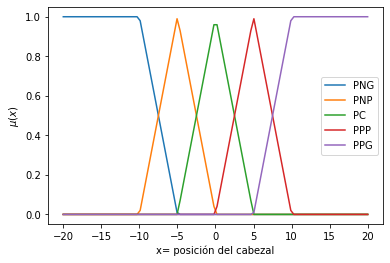

In [43]:
# Gráficos para la posición del cabezal
plt.plot(pos_cabezal, PNG, label="PNG")
plt.plot(pos_cabezal, PNP, label="PNP")
plt.plot(pos_cabezal, PC, label="PC")
plt.plot(pos_cabezal, PPP, label="PPP")
plt.plot(pos_cabezal, PPG, label="PPG")
plt.legend(loc='best')
plt.xlabel('x= posición del cabezal')
plt.ylabel('$\mu (x)$')
plt.show()

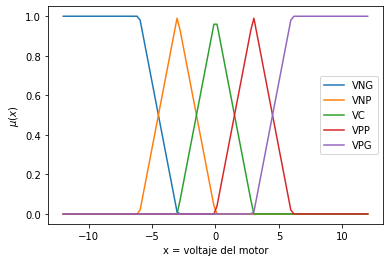

In [44]:
# Gráficos para el voltaje
plt.plot(voltaje, VNG, label="VNG")
plt.plot(voltaje, VNP, label="VNP")
plt.plot(voltaje, VC, label="VC")
plt.plot(voltaje, VPP, label="VPP")
plt.plot(voltaje, VPG, label="VPG")
plt.legend(loc='best')
plt.xlabel('x = voltaje del motor')
plt.ylabel('$\mu (x)$')
plt.show()

<h4>2. Fusificación</h4>

2.1. Determinamos el grado pertenencia de 'p0' a cada conjunto difuso de entrada

val_PNG = 0.0
val_PNP = 0.0
val_PC = 0.0
val_PPP = 0.6
val_PPG = 0.4


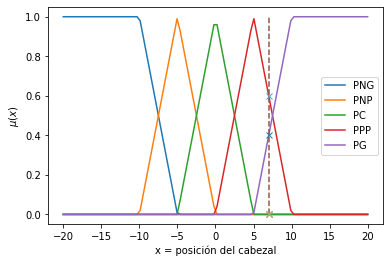

In [41]:
p0 = 7 # el valor actual de posición del cabezal (entrada)


val_PNG = trapmf(p0, [-20, -20, -10, -5])
val_PNP = trimf(p0, [-10, -5, 0])
val_PC = trimf(p0, [-5, 0, 5])
val_PPP = trimf(p0, [0, 5, 10])
val_PPG = trapmf(p0, [5, 10, 20, 20])

# Visualizamos los valores
print('val_PNG =',val_PNG)
print('val_PNP =',val_PNP)
print('val_PC =',val_PC)
print('val_PPP =',val_PPP)
print('val_PPG =',val_PPG)

# Representamos gráficamente las funciones relativas a la posición del cabezal
plt.plot(pos_cabezal, PNG, label="PNG")
plt.plot(pos_cabezal, PNP, label="PNP")
plt.plot(pos_cabezal, PC, label="PC")
plt.plot(pos_cabezal, PPP, label="PPP")
plt.plot(pos_cabezal, PPG, label="PG")
plt.legend(loc='best')

# Representamos gráficamente el corte de p0 (Singleton) con las funciones de posición de cabezal
plt.plot([p0, p0], [0.0, 1.0], linestyle="--")
plt.plot(p0, val_PNG, 'x')
plt.plot(p0, val_PNP, 'x')
plt.plot(p0, val_PC, 'x')
plt.plot(p0, val_PPP, 'x')
plt.plot(p0, val_PPG, 'x')
plt.xlabel('x = posición del cabezal')
plt.ylabel('$\mu (x)$')
plt.show()


<h4>2.2. Aplicamos el método de inferencia </h4>

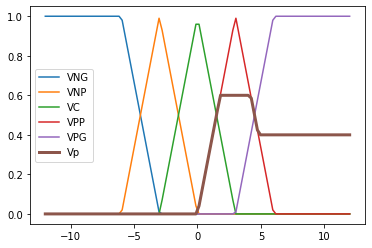

In [42]:
# Se calculan las funciones cortadas (funciones Bx, donde x = 1..n)
VNGp = cut(val_PNG, VNG) # VNGp = 'Voltaje negativo pequeño prima'
VNPp = cut(val_PNP, VNP)
VCp = cut(val_PC, VC)
VPPp = cut(val_PPP, VPP)
VPGp = cut(val_PPG, VPG)

# Unimos las funciones cortadas (la unión genera una función difusa B' que es el área "de máximos" de la funciones cortadas)
Vp = union([VNGp, VNPp, VCp, VPPp, VPGp])

# ... y lo representamos
plt.plot(voltaje, VNG, label="VNG")
plt.plot(voltaje, VNP, label="VNP")
plt.plot(voltaje, VC, label="VC")
plt.plot(voltaje, VPP, label="VPP")
plt.plot(voltaje, VPG, label="VPG")
plt.plot(voltaje, Vp, label="Vp", linewidth=3)
plt.legend(loc='best')
plt.show()

<h4>3. Defusificación </h4>

In [45]:
# Aplicamos defusificación de acuerdo a diferentes métodos para obtener el valor de voltaje para el motor
out_centroid = defuzz(voltaje, Vp, 'centroid')
out_bisector = defuzz(voltaje, Vp, 'bisector')
out_MOM = defuzz(voltaje, Vp, 'MOM')
out_SOM = defuzz(voltaje, Vp, 'SOM')
out_LOM = defuzz(voltaje, Vp, 'LOM')

print('out_centroid = ', out_centroid)
print('out_bisector = ', out_bisector)
print('out_MOM = ', out_MOM)
print('out_SOM = ', out_SOM)
print('out_LOM = ', out_LOM)

out_centroid =  5.966848940533156
out_bisector =  5.454545454545453
out_MOM =  2.909090909090909
out_SOM =  1.8181818181818183
out_LOM =  4.0


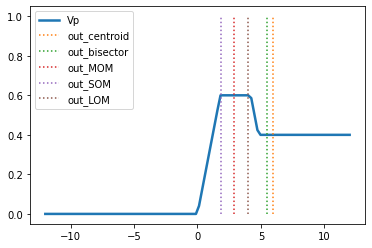

In [46]:
# Representamos gráficamente a fin de comparar qué resulta de aplicar cada método

plt.plot(voltaje, Vp, linewidth=2.5, linestyle="-", label="Vp")
plt.plot([out_centroid, out_centroid], [0, 1], linestyle=":", label="out_centroid")
plt.plot([out_bisector, out_bisector], [0, 1], linestyle=":", label="out_bisector")
plt.plot([out_MOM, out_MOM], [0, 1], linestyle=":", label="out_MOM")
plt.plot([out_SOM, out_SOM], [0, 1], linestyle=":", label="out_SOM")
plt.plot([out_LOM, out_LOM], [0, 1], linestyle=":", label="out_LOM")
plt.legend(loc='best')
plt.show()

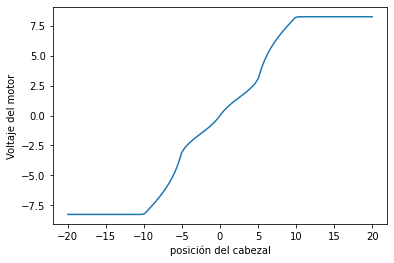

In [29]:
# EXTRA: Gráfico de la superficie de control
# La superficie de control (o curvas de controlador) permiten visualizar la salida del controlador para los distintos valores de posición del cabezal.

pos_cabezal = np.linspace(-20, 20, 100)     # entrada (posición del cabezal)
val_voltaje = np.zeros(voltaje.size)        # salida (voltaje del motor)

for i in range(pos_cabezal.size):
    val = float(pos_cabezal[i])
    
    # Fusificación
    val_PNGi = trapmf(val, [-20, -20, -10, -5])
    val_PNPi = trimf(val, [-10, -5, 0])
    val_PCi = trimf(val, [-5, 0, 5])
    val_PPPi = trimf(val, [0, 5, 10])
    val_PPGi = trapmf(val, [5, 10, 20, 20])
    
    # Método de inferencia
    VNGpi = cut(val_PNGi, VNG)
    VNPpi = cut(val_PNPi, VNP)
    VCpi = cut(val_PCi, VC)
    VPPpi = cut(val_PPPi, VPP)
    VPGpi = cut(val_PPGi, VPG)

    Vp = union([VNGpi, VNPpi, VCpi, VPPpi, VPGpi])
    
    # Defusificación
    val_voltaje[i] = defuzz(voltaje, Vp, 'centroid')
    
plt.plot(pos_cabezal, val_voltaje)
plt.xlabel('posición del cabezal')
plt.ylabel('Voltaje del motor')
plt.show()


<h3>Procedimiento abreviado para uso con la librería <i>fuzzy.py</i></h3>

voltaje: 1.9962136545593576


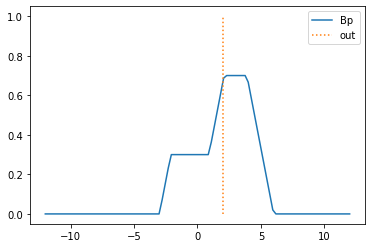

In [35]:
# 1. Definir universo de discurso para entrada y salida
x = np.linspace(-20, 20, 100)
y = np.linspace(-12, 12, 100)

# 2. Definir las funciones de membresía para reglas de control
#    en la forma "Si x es Ai, entonces y es Bi"
A1 = [trapmf, [-20, -20, -10, -5]]
A2 = [trimf, [-10, -5, 0]]
A3 = [trimf, [-5, 0, 5]]
A4 = [trimf, [0, 5, 10]]
A5 = [trapmf, [5, 10, 20, 20]]

B1 = [trapmf, [-12, -12, -6, -3]]
B2 = [trimf, [-6, -3, 0]]
B3 = [trimf, [-3, 0, 3]]
B4 = [trimf, [0, 3, 6]]
B5 = [trapmf, [3, 6, 12, 12]]

A = [A1, A2, A3, A4, A5]
B = [B1, B2, B3, B4, B5]

# 3. Implementar el Modus Ponens a partir de un valor de entrada
x0 = 3.5
Bp = fuzz(x0, y, A, B)

# 4. Defuzzificar para obtener la salida
voltaje = defuzz(y, Bp, 'centroid')

print("voltaje:", voltaje)
plt.plot(y, Bp, label="Bp")
plt.plot([voltaje, voltaje], [0, 1], linestyle=":", label="out")
plt.legend(loc='best')
plt.show()

In [31]:
# ¿Cuánto tarda el proceso de cálculo?
from time import time  #importamos la librería para medir tiempo
t_inicial = time()

#  medimos desde aquí --->
Bp = fuzz(x0, y, A, B)
out = defuzz(y, Bp, 'centroid')
# ---> hasta aquí

t_final = time() 
print("Tiempo de ejecucion:", t_final - t_inicial)

Tiempo de ejecucion: 0.003947734832763672


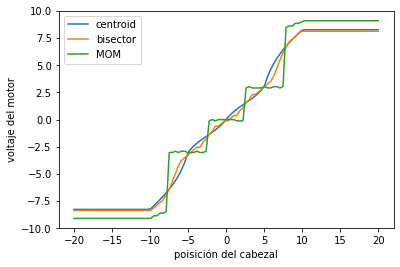

In [33]:
# Curvas de control para los distintos métodos de defuzzificación:
out_centroid = np.zeros(x.size)
out_bisector = np.zeros(x.size)
out_MOM = np.zeros(x.size)
out_SOM = np.zeros(x.size)
out_LOM = np.zeros(x.size)
    
for i in range(x.size):
    x0 = float(x[i])
    Bp = fuzz(x0, y, A, B)
    out_centroid[i] = defuzz(y, Bp, 'centroid')
    out_bisector[i] = defuzz(y, Bp, 'bisector')
    out_MOM[i] = defuzz(y, Bp, 'MOM')
    out_SOM[i] = defuzz(y, Bp, 'SOM')
    out_LOM[i] = defuzz(y, Bp, 'LOM')
    
plt.plot(x, out_centroid, label="centroid")
plt.plot(x, out_bisector, label="bisector")
plt.plot(x, out_MOM, label="MOM")
#pl.plot(x, out_SOM, label="SOM")
#pl.plot(x, out_LOM, label="LOM")
plt.legend()
plt.xlabel('poisición del cabezal')
plt.ylabel('voltaje del motor')
plt.show()